In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import matplotlib.ticker as ticker

### 3.3 ) 

In [31]:
data = pd.read_csv("3_3.csv", delimiter=";")
data


,Courant alimentation (mA),Puissance diode (µW),Courant photodiode interne (mA)
0,15.0,6.13,0.000
1,22.5,11.40,0.001
2,30.0,20.45,0.002
3,40.0,680.00,0.047


In [40]:
I_alim = data["Courant alimentation (mA)"]
P_diode = data["Puissance diode (µW)"] * 1e-3
I_photo = data["Courant photodiode interne (mA)"]

S = I_photo / P_diode
data["Sensibilité (mA/mW)"] = S

S_moy = np.mean(S)
print("Moyenne sensibilité (mA/mW) :", S_moy)


Moyenne sensibilité (mA/mW) : 0.06365911407672063


### 3.4 ) 

1/ Déterminer R

In [42]:
data = pd.read_csv("3_4.csv", delimiter=";")
data

,Courant d'alimentation (mA),Tension photodiode interne (V)
0,0.000,1.825
1,0.001,2.015
2,0.002,2.087
3,0.005,2.119
4,0.030,2.127
5,0.100,2.138
6,0.150,2.146
7,0.220,2.156
8,0.300,2.168
9,0.400,2.182


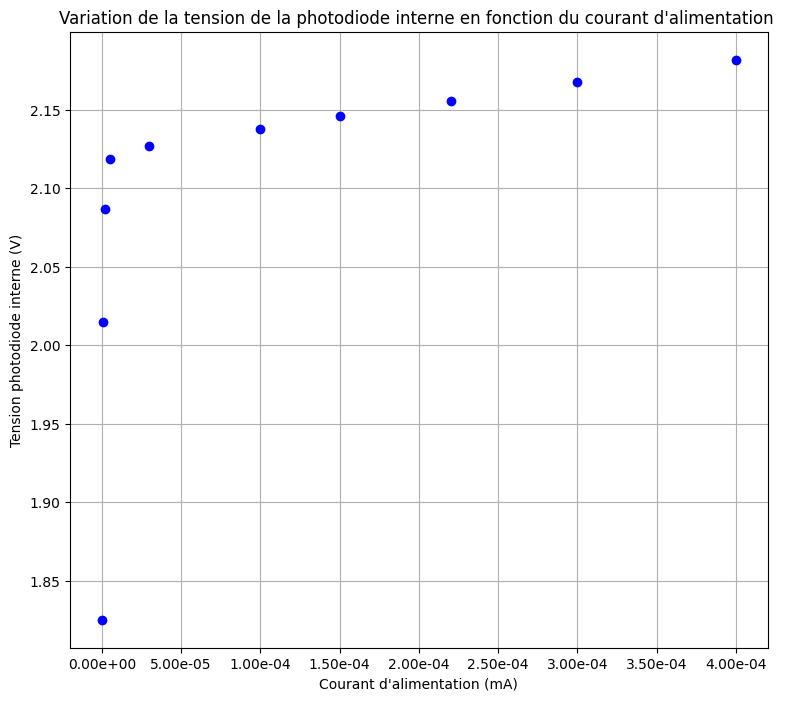

In [62]:
I_alim = data["Courant d'alimentation (mA)"] * 1e-3
U_photo = data["Tension photodiode interne (V)"]

plt.figure(figsize=(9, 8))
plt.plot(I_alim, U_photo, 'o', color="blue")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2e}'))
plt.title("Variation de la tension de la photodiode interne en fonction du courant d'alimentation ")
plt.xlabel("Courant d'alimentation (mA)")
plt.ylabel("Tension photodiode interne (V)")
plt.grid()
plt.show()

La résistance interne estimée est : 155.033 Ohms


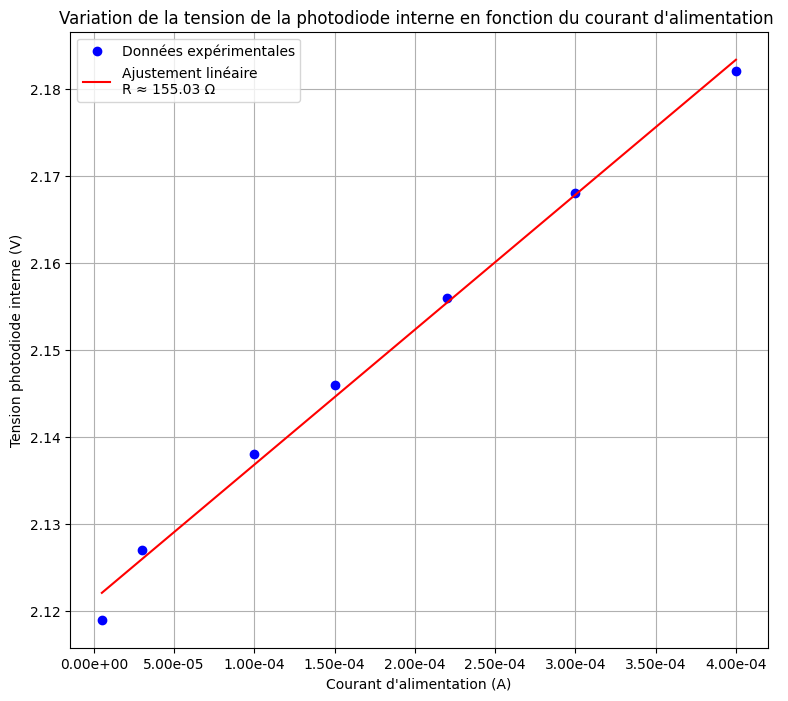

In [82]:
start_index = 3 
end_index = 10

I_linear = I_alim[start_index:end_index]
U_linear = U_photo[start_index:end_index]

coefficients = np.polyfit(I_linear, U_linear, 1)  
slope = coefficients[0]  
print(f"La résistance interne estimée est : {slope:.3f} Ohms")

plt.figure(figsize=(9, 8))
plt.plot(I_alim[3:], U_photo[3:], 'o', color="blue", label="Données expérimentales")
plt.plot(I_linear, np.polyval(coefficients, I_linear), color="red", label=f"Ajustement linéaire\nR ≈ {slope:.2f} Ω")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2e}'))
plt.title("Variation de la tension de la photodiode interne en fonction du courant d'alimentation ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Tension photodiode interne (V)")
plt.legend()
plt.grid()
plt.show()

2/ Déterminer longueur d'onde moyenne

In [97]:
h = 6.626e-34  
c = 3.00e8     
e = 1.602e-19  

# Estimation de la tension seuil à partir de la courbe 
U_seuil = 2.087

# Calcul de la longueur d'onde
lambda_m = (h * c) / (e * U_seuil)  
lambda_nm = lambda_m * 1e9  

print(f"Longueur d'onde moyenne estimée : {lambda_nm:.1f} nm")

Longueur d'onde moyenne estimée : 594.5 nm


### 3.5 )

### T = 10 kOhm

In [181]:
data = pd.read_csv("3_5_T10.csv", delimiter=";")
data = data.sort_values(by="Courant d'alimentation (mA)").reset_index(drop=True)
data


,Courant d'alimentation (mA),Courant photodiode interne (mA),Puissance émise(W),Tension photodiode interne (V)
0,20.0,0.0010,0.000009,2.035
1,23.4,0.0010,0.000012,2.053
2,28.2,0.0020,0.000018,2.078
3,30.0,0.0020,0.000021,2.087
4,35.0,0.0030,0.000039,2.110
5,38.0,0.0130,0.000223,2.124
6,40.0,0.0066,0.000939,2.132
7,43.1,0.1450,0.002008,2.144
8,45.7,0.2150,0.003062,2.155
9,48.1,0.2740,0.003977,2.164


In [182]:
I_alim = data["Courant d'alimentation (mA)"] * 1e-3
I_photo = data["Courant photodiode interne (mA)"] * 1e-3
P_emise = data["Puissance émise(W)"]
U_photo = data["Tension photodiode interne (V)"]

Courbe P_emise en fonction de I_alim

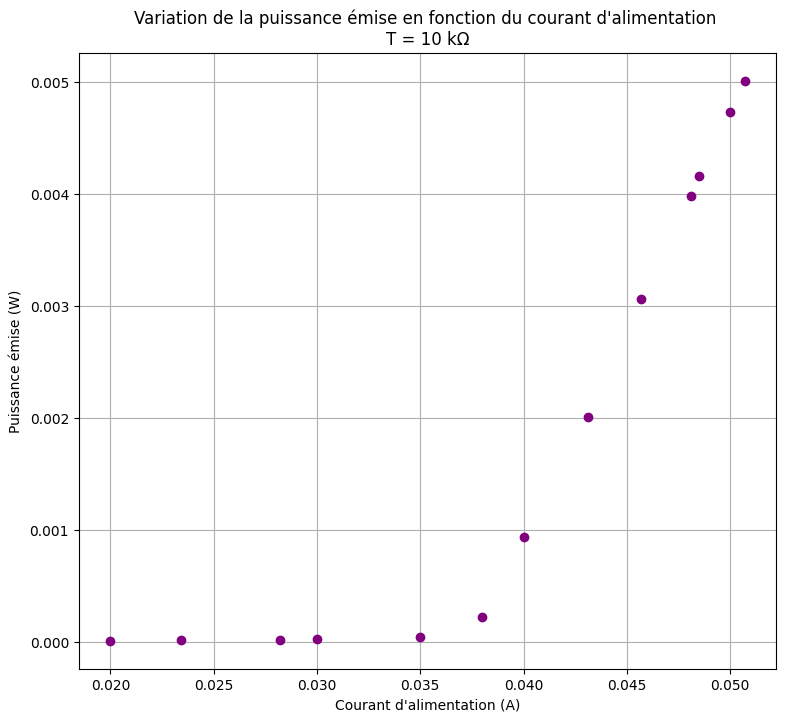

In [183]:
plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise, "o", color="purple")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 10 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.grid()
plt.show()

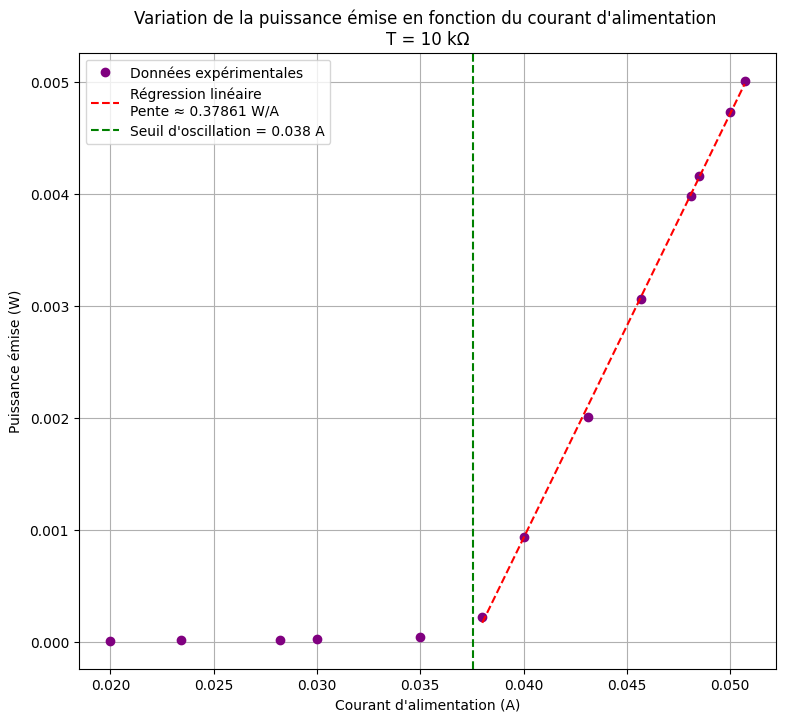

In [184]:
i_start, i_end = 5, 13
I_fit = I_alim[i_start:i_end]
P_fit = P_emise[i_start:i_end]
slope, intercept, r, _, _ = linregress(I_fit, P_fit)

seuil_osc= -intercept / slope

plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise, 'o', label="Données expérimentales", color="purple")
plt.plot(I_fit, slope * I_fit + intercept, 'r--',
         label=f"Régression linéaire \nPente ≈ {slope:.5f} W/A")
plt.axvline(seuil_osc, color='green', linestyle='--', label=f"Seuil d'oscillation = {seuil_osc:.3f} A")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 10 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.legend()
plt.grid()
plt.show()



( Avec le wattmètre, on mesure la puissance lumineuse émise par la diode laser (appli ordi))


Vérifier sur feuille de TP la formule de la puissance électrique dissipée

L'efficacité totale mesure l'efficacité globale avec laquelle la diode laser transforme l'énergie électrique en énergie lumineuse.

In [185]:
# Puissance électrique dissipée (en W)
P_dissip = U_photo * I_alim

# Calcul de l'efficacité totale
eff_totale = P_emise / P_dissip

# Puissance seuil (à déterminer avec le graphe précédent ???)
P_seuil = 0.000223

# Calcul de l'efficacité différentielle
eff_diff = P_emise / (P_dissip - P_seuil)  # En mW/(W - W)

# Afficher les résultats
print(f"Efficacité totale : {np.mean(eff_totale):.5f}")
print(f"Efficacité différentielle : {np.mean(eff_diff):.5f} ")



Efficacité totale : 0.01808
Efficacité différentielle : 0.01812 


### T = 12 kOhm

In [186]:
data = pd.read_csv("3_5_T12.csv", delimiter=";")
data = data.sort_values(by="Courant d'alimentation (mA)").reset_index(drop=True)
data

,Courant d'alimentation (mA),Courant photodiode interne (mA),Puissance émise(W),Tension photodiode interne (V)
0,20.0,0.001,0.000012,2.040
1,24.2,0.001,0.000016,2.064
2,29.0,0.002,0.000024,2.089
3,34.1,0.005,0.000055,2.114
4,40.0,0.127,0.001790,2.136
5,45.5,0.272,0.003930,2.160
6,49.5,0.377,0.005540,2.176
7,50.5,0.405,0.005921,2.180


In [187]:
I_alim = data["Courant d'alimentation (mA)"] * 1e-3
I_photo = data["Courant photodiode interne (mA)"] * 1e-3
P_emise = data["Puissance émise(W)"]
U_photo = data["Tension photodiode interne (V)"]

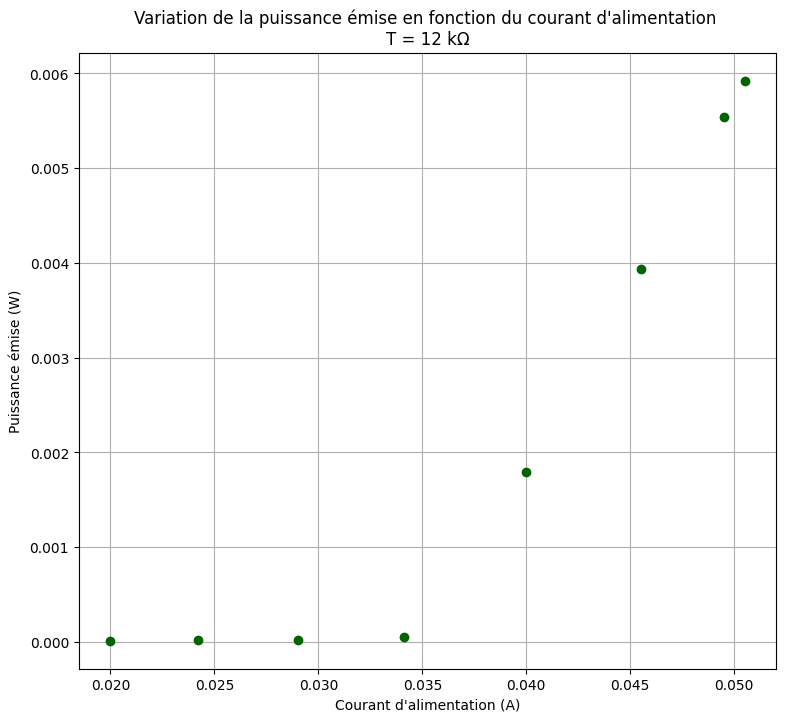

In [188]:
plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise, "o", color="darkgreen")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 12 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.grid()
plt.show()

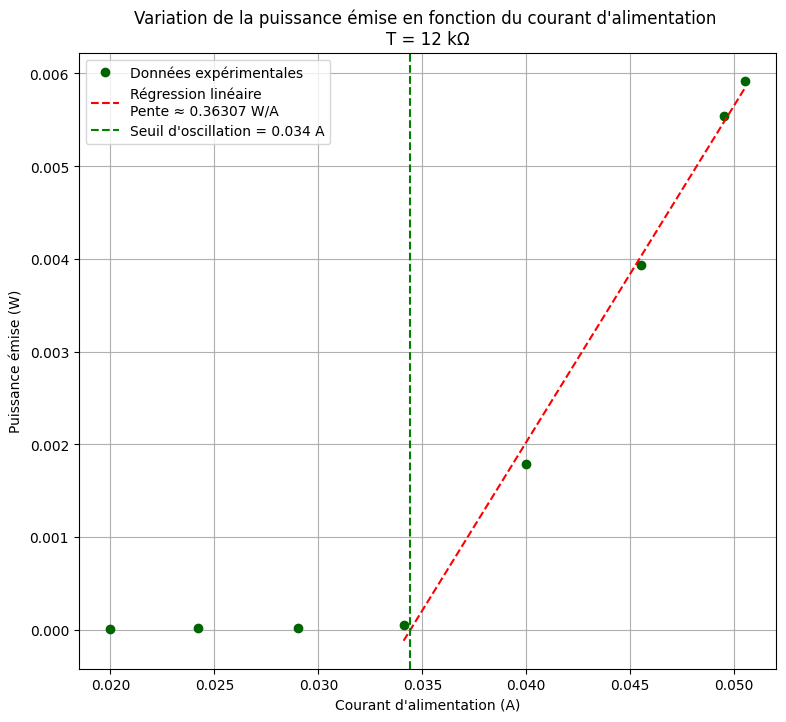

In [189]:
i_start, i_end = 3, 8
I_fit = I_alim[i_start:i_end]
P_fit = P_emise[i_start:i_end]
slope, intercept, r, _, _ = linregress(I_fit, P_fit)

seuil_osc= -intercept / slope

plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise, 'o', label="Données expérimentales", color="darkgreen")
plt.plot(I_fit, slope * I_fit + intercept, 'r--',
         label=f"Régression linéaire \nPente ≈ {slope:.5f} W/A")
plt.axvline(seuil_osc, color='green', linestyle='--', label=f"Seuil d'oscillation = {seuil_osc:.3f} A")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 12 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.legend()
plt.grid()
plt.show()

In [190]:
# Puissance électrique dissipée (en W)
P_dissip = U_photo * I_alim

# Calcul de l'efficacité totale
eff_totale = P_emise / P_dissip

# Puissance seuil (à déterminer avec le graphe précédent ???)
P_seuil = 0.000223

# Calcul de l'efficacité différentielle
eff_diff = P_emise / (P_dissip - P_seuil) 

# Afficher les résultats
print(f"Efficacité totale : {np.mean(eff_totale):.5f}")
print(f"Efficacité différentielle : {np.mean(eff_diff):.5f} ")


Efficacité totale : 0.02099
Efficacité différentielle : 0.02104 


T = 10 kOhm : 
Seuil = 0.038 A

T = 12 kOhm :
Seuil = 0.034 A

Le seuil d'oscillation correspond au courant minimum nécessaire pour que la diode laser commence à émettre de la lumière.
Plus T augmente, plus seuil diminue.
La puissance émise augmente quand la T° augmente.